Flight Fare Prediction Dataset by MachineHa

Problem Statement¶
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:


Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Problem statement

This project aims to develop a supervised machine learning model to predict flight prices. Given a set of features that influence flight costs, the model will learn the underlying relationships and be able to estimate the price of future flights.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# from google.colab import drive
# drive.mount('/content/Data_Train.xlsx')

In [ ]:

import warnings
warnings.filterwarnings("ignore")


## EDA and Feature engineering

In [ ]:
df=pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

The data is almost cleaned, with only null values remaining in the Route and Total stops columns. I can directly drop them

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.drop_duplicates( inplace=True)

In [ ]:
df.shape

(10463, 11)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


All the data types are currently objects. They need to be converted to their respective data types. First, try to change the data type of the time-related fields

In [ ]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

Creating a new column for weekends seems necessary, as people probably want to plan their flights on the weekend

In [ ]:
df["DayOfWeek"] = pd.to_datetime(df.Date_of_Journey).dt.dayofweek

Creating a new column weekend.People probal

In [ ]:
def is_weekend(day):
    return 1 if day in [5, 6] else 0

In [ ]:
df['Weekend'] = df['DayOfWeek'].apply(is_weekend)

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,DayOfWeek,Weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,0


In [ ]:
df.drop(['Date_of_Journey','DayOfWeek'], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Weekend
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0


Converting Depature time( which is object) to a real time

In [ ]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Doing the same thing with Arrival time

In [ ]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,0,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,1,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,1,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,21,35


In [ ]:
duration=list(df['Duration'])
# creating a list that contain duration



# here it is in text format trying to convert it to time
# if it has a space leaving as it is or adding zero hour or zero minute in it
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

            #  here adding necessary space is crucial for getting in the correct format
            #  before 0m necessary space should be given -->' 0m'.same for the hour format

In [ ]:
df['Duration']=duration

In [ ]:
def hour(x):
    return x.split(' ')[0][0:-1]
    # spliting it by space and taking the 1st part of it
    # 15h 20m-->15h
    # secondly removing the h of 15h
    # 15h-->15

def minutes(x):
    return x.split(' ')[1][0:-1]

In [ ]:
df['dur_hour']=df['Duration'].apply(hour)

In [ ]:
df['dur_min']=df['Duration'].apply(minutes)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,0,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,1,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,1,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,21,35,4,45


In [ ]:
df.drop(['Duration'], axis = 1, inplace = True)

In [ ]:
df.Airline.value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [ ]:
category_counts = df['Airline'].value_counts()

<Axes: xlabel='count', ylabel='Airline'>

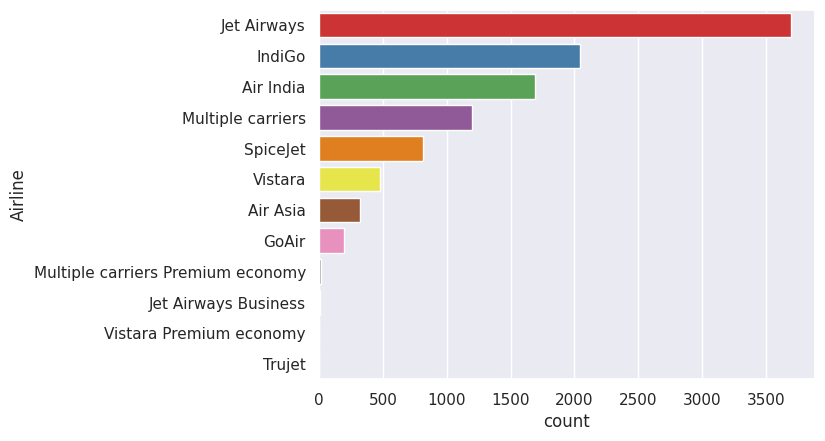

In [ ]:
sns.countplot(df.Airline ,order=category_counts.index,palette="Set1")

Jet Airways appears to be the most popular airline,followed by Indigo,Air India carrying the most number of passengers.
Jet Airways Business seems to be the least popular, carrying the fewest number of passengers according to the graph.
There is a significant difference in the number of passengers carried by different airlines.

A flight that involves multiple airlines/carrier is called a flight with a connection, where different airlines operate the different legs of the flight. For example, a flight from New York City to Berlin might involve flying United Airlines from New York City to Amsterdam, and then Lufthansa from Amsterdam to Berlin.


Multiple Premium Economy, Jet Airways Business, Vistara Premium Economy, and Trujet have a limited number of flights. They can be treated separately by making all of them a separate category (others) or dropping them.

In a practical situation, a substantial number of flights part of the premium class. We aim to train our model using this data as it is, without making any changes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

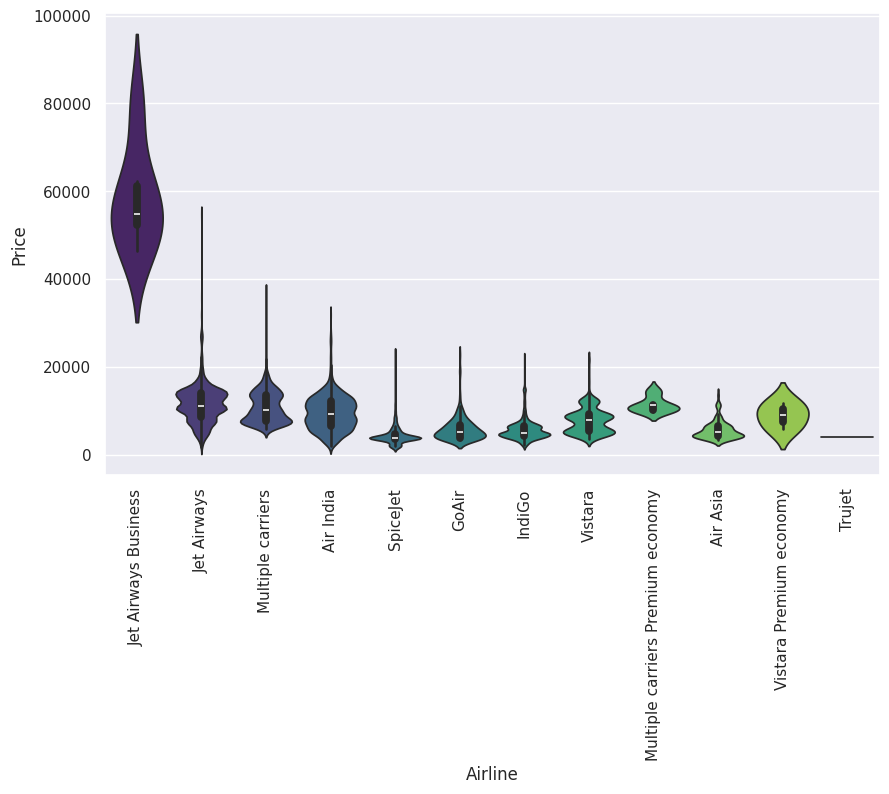

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(y='Price',x='Airline',data=df.sort_values("Price", ascending = False),palette='viridis')
plt.xticks(rotation=90)

Jet Airways Business is charging a higher fare for tickets. Since there are only six tickets in this category, we are excluding it for now. Otherwise, we would need to investigate further to determine if it's due to being a premium flight or if the destination is significantly distant.

<Axes: xlabel='Total_Stops', ylabel='count'>

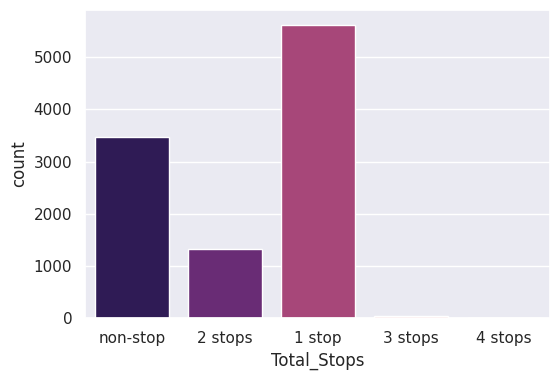

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Total_Stops", data=df,palette='magma')

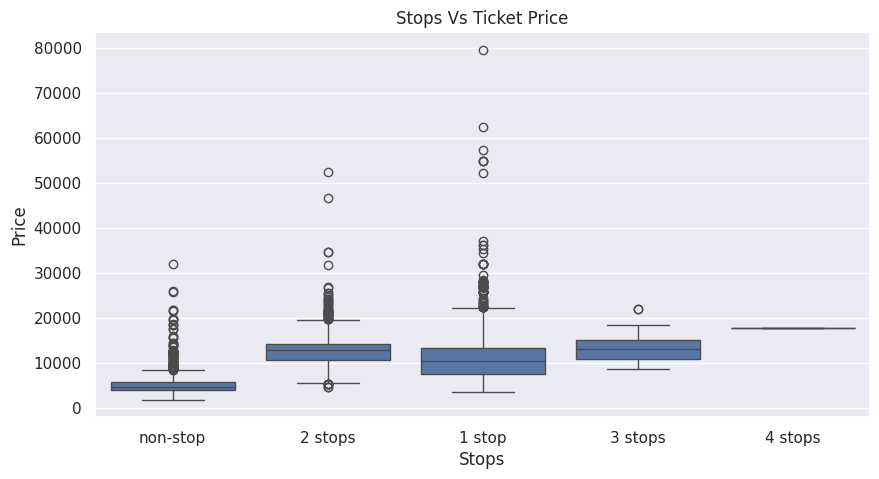

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=df)
plt.title('Stops Vs Ticket Price')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()

I believe the stop category might not have a significant impact because most of their prices fall within the same range. The variability in the stop category seems to be minimal

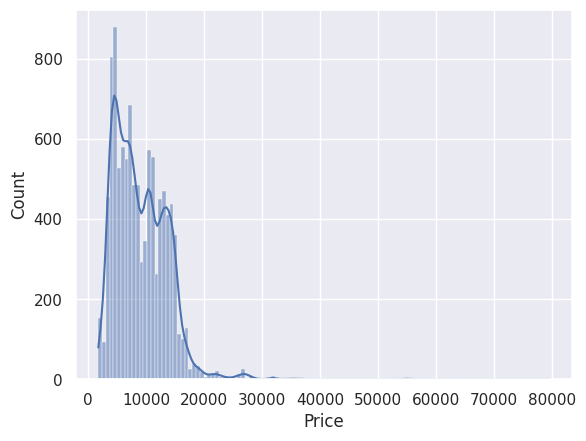

In [ ]:
# Create a histogram of the price data
sns.histplot(data=df, x="Price", kde=True)

# Calculate the interquartile range (IQR)
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Drop rows with outlier values
df_filtered = df[df["Price"].between(lower_bound, upper_bound)]



<Axes: xlabel='Price', ylabel='Count'>

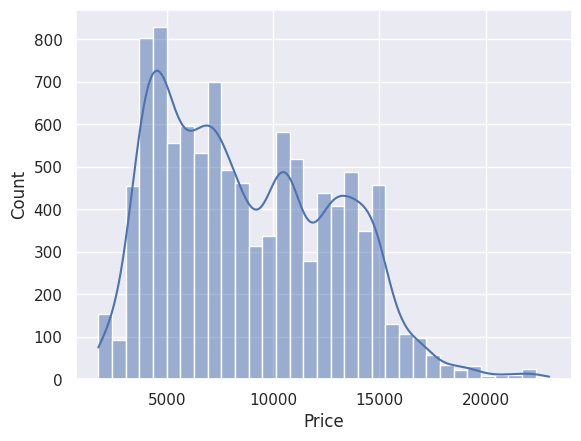

In [ ]:
# Create a new histogram of the filtered price data
sns.histplot(data=df_filtered, x="Price", kde=True)

In [ ]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [ ]:
df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')

In [ ]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [ ]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

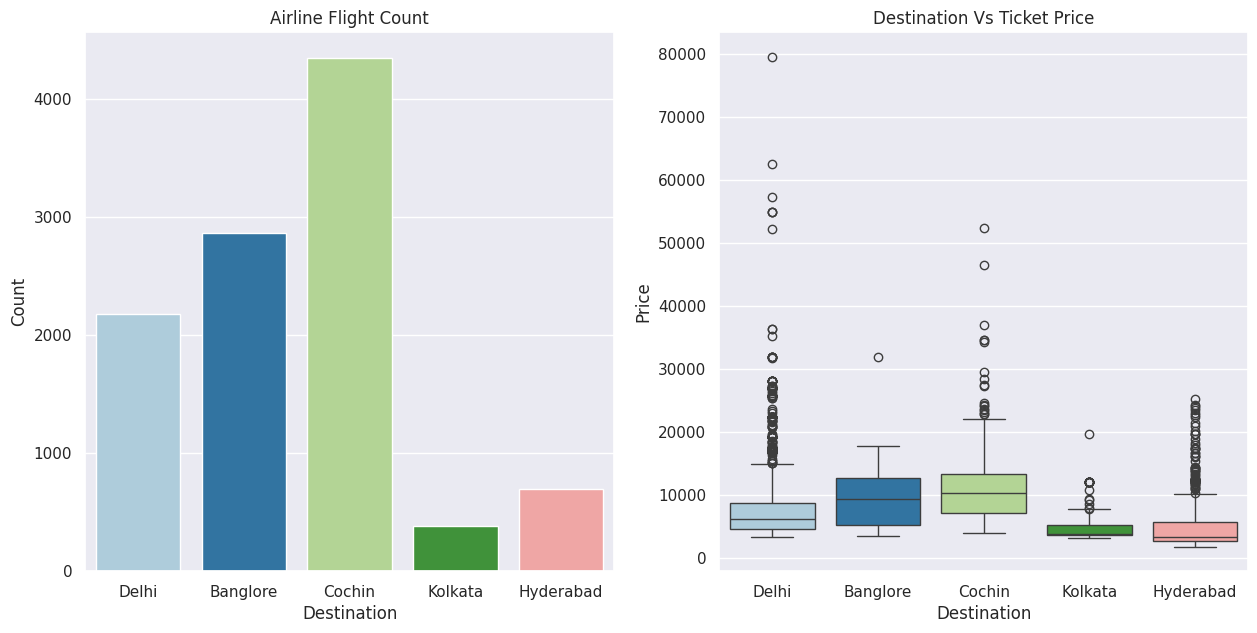

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x='Destination',data=df,palette='Paired')
plt.title('Airline Flight Count')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Price',data=df,palette='Paired')
plt.title('Destination Vs Ticket Price')
plt.xlabel('Destination')
plt.ylabel('Price')

plt.show()

## One-Hot Encoding

In [ ]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Delhi'),
  Text(2, 0, 'Kolkata'),
  Text(3, 0, 'Mumbai'),
  Text(4, 0, 'Chennai')])

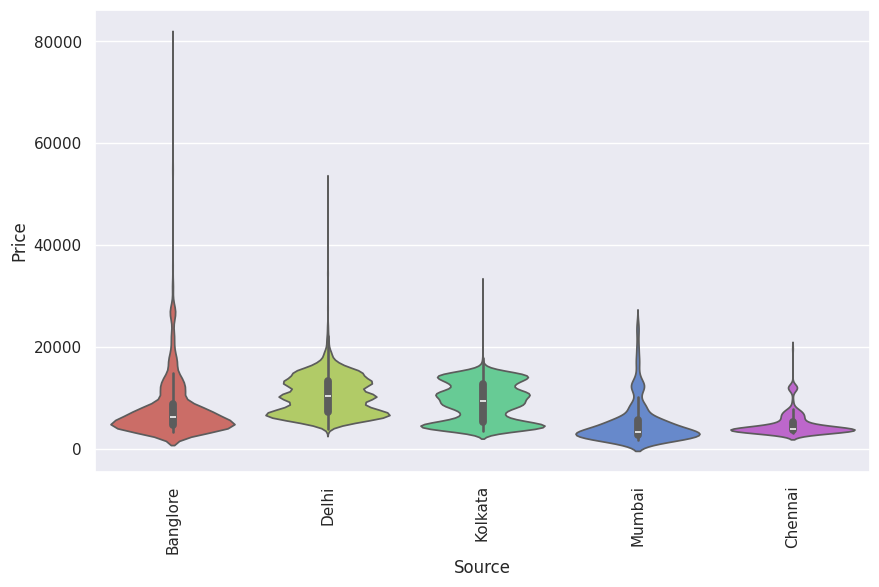

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(y='Price',x='Source',data=df.sort_values("Price", ascending = False),palette='hls')
plt.xticks(rotation=90)

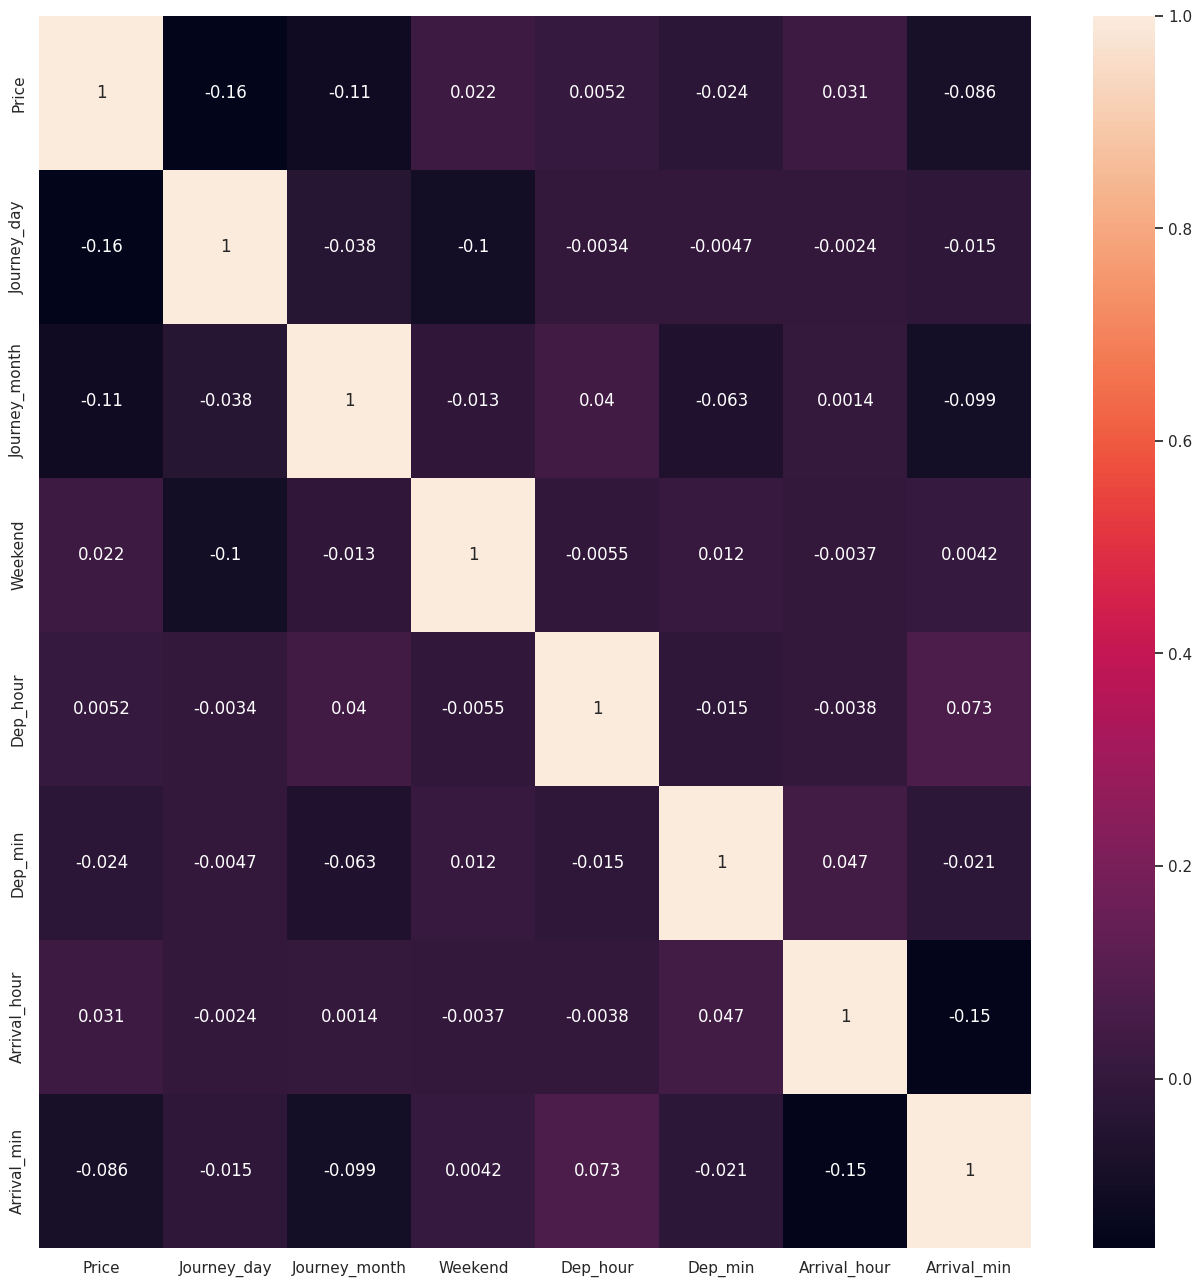

In [ ]:
# Create a new DataFrame with only int type values from df
df_int = df.select_dtypes(include=['int'])

# Calculate the correlation matrix
correlation_matrix = df_int.corr()
plt.figure(figsize=(16, 16))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)


# Display the heatmap
plt.show()

In [ ]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [ ]:
# order = destination_counts.index


<Axes: xlabel='Destination', ylabel='count'>

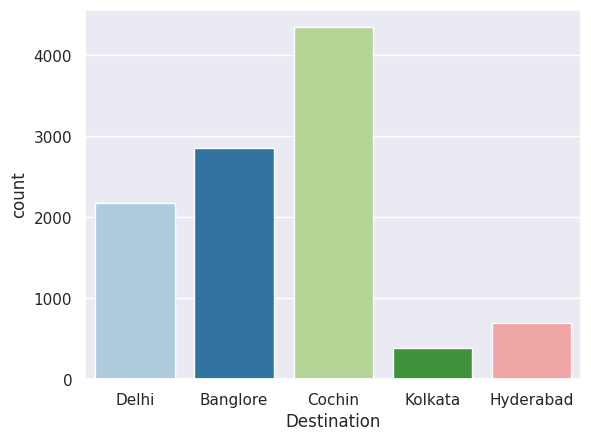

In [ ]:

sns.countplot(x=df["Destination"], data=df, palette="Paired")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Cochin'),
  Text(2, 0, 'Banglore'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Kolkata')])

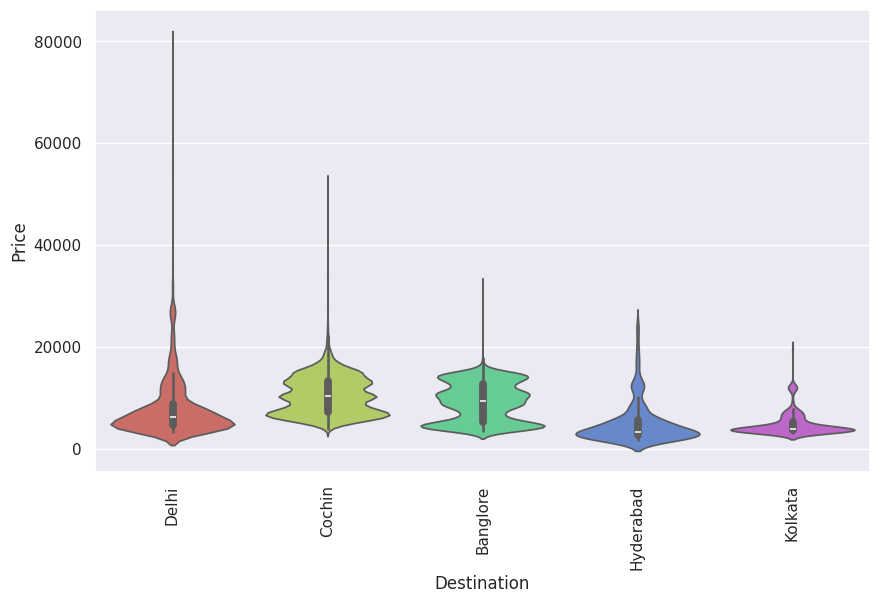

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(y='Price',x='Destination',data=df.sort_values("Price", ascending = False),palette='hls')
plt.xticks(rotation=90)

In [ ]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,False,True,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False


In [ ]:
df.Additional_Info

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10462, dtype: object

majority is no info so dropping it

Total_Stops providing the same value as Total_Stops

In [ ]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [ ]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min
0,IndiGo,Banglore,Delhi,0,3897,24,3,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,0,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,1,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,1,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,0,16,50,21,35,4,45


In [ ]:
new_df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [ ]:
new_df['dur_hour'] = new_df['dur_hour'].astype(int)
new_df['dur_min'] = new_df['dur_min'].astype(int)

In [ ]:
new_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10462 non-null  object
 1   Source         10462 non-null  object
 2   Destination    10462 non-null  object
 3   Total_Stops    10462 non-null  int64 
 4   Price          10462 non-null  int64 
 5   Journey_day    10462 non-null  int32 
 6   Journey_month  10462 non-null  int32 
 7   Weekend        10462 non-null  int64 
 8   Dep_hour       10462 non-null  int32 
 9   Dep_min        10462 non-null  int32 
 10  Arrival_hour   10462 non-null  int32 
 11  Arrival_min    10462 non-null  int32 
 12  dur_hour       10462 non-null  object
 13  dur_min        10462 non-null  object
dtypes: int32(6), int64(3), object(5)
memory usage: 1.2+ MB


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10462 non-null  int64
 1   Price                                      10462 non-null  int64
 2   Journey_day                                10462 non-null  int32
 3   Journey_month                              10462 non-null  int32
 4   Weekend                                    10462 non-null  int64
 5   Dep_hour                                   10462 non-null  int32
 6   Dep_min                                    10462 non-null  int32
 7   Arrival_hour                               10462 non-null  int32
 8   Arrival_min                                10462 non-null  int32
 9   dur_hour                                   10462 non-null  int64
 10  dur_min                                    10462 no

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_df[['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'dur_hour', 'dur_min']] = scaler.fit_transform(new_df[['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'dur_hour', 'dur_min']])


In [ ]:
new_df.head()

,Total_Stops,Price,Journey_day,Journey_month,Weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,1.244442,-1.462080,1,1.662578,-0.234123,-1.807045,-0.888367,-0.958051,1.290990,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,2,7662,-1.471958,0.256507,0,-1.305841,1.360364,-0.056554,-0.586611,-0.361223,-0.190195,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2,13882,-0.527123,1.115800,1,-0.607390,0.031625,-1.369422,0.016902,1.071164,-1.671380,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,1,6218,-0.172810,0.256507,1,0.964126,-1.031367,1.402189,0.318658,-0.599954,-0.190195,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,1,13302,-1.471958,-1.462080,0,0.614900,1.360364,1.110440,0.620415,-0.719320,0.994753,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x = new_df.drop('Price', axis = 1)
y = new_df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
x_corr = x_train.drop(Source, axis = 1)

## Most important features

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [ ]:
selection.feature_importances_


array([2.14186871e-01, 1.27290419e-01, 5.68979197e-02, 1.35769824e-02,
       2.48481314e-02, 2.14442436e-02, 2.81600267e-02, 1.88252705e-02,
       1.59295217e-01, 1.84088849e-02, 9.80583008e-03, 1.91374849e-03,
       1.75216466e-02, 1.24836293e-01, 6.80026316e-02, 1.98513862e-02,
       8.90378742e-04, 5.45194287e-03, 1.24152369e-04, 4.31300764e-03,
       6.59336847e-05, 6.79706451e-04, 1.29617028e-02, 4.83970773e-03,
       7.86210396e-03, 7.64671590e-03, 2.11494660e-02, 8.39177434e-03,
       7.57905589e-04])

In [ ]:
x.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Weekend', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'dur_hour', 'dur_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [ ]:
dataframe = pd.DataFrame({
    'features': x.columns,
    'importance': selection.feature_importances_
})

In [ ]:
dataframe

,features,importance
0,Total_Stops,0.214187
1,Journey_day,0.127290
2,Journey_month,0.056898
3,Weekend,0.013577
4,Dep_hour,0.024848
5,Dep_min,0.021444
6,Arrival_hour,0.028160
7,Arrival_min,0.018825
8,dur_hour,0.159295
9,dur_min,0.018409


In [ ]:
top_10_features = dataframe.sort_values(by='importance', ascending=False).head(10)
print(top_10_features)

                        features  importance
0                    Total_Stops    0.214187
8                       dur_hour    0.159295
1                    Journey_day    0.127290
13           Airline_Jet Airways    0.124836
14  Airline_Jet Airways Business    0.068003
2                  Journey_month    0.056898
6                   Arrival_hour    0.028160
4                       Dep_hour    0.024848
5                        Dep_min    0.021444
26             Destination_Delhi    0.021149


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Total_Stops'),
  Text(1, 0, 'dur_hour'),
  Text(2, 0, 'Journey_day'),
  Text(3, 0, 'Airline_Jet Airways'),
  Text(4, 0, 'Airline_Jet Airways Business'),
  Text(5, 0, 'Journey_month'),
  Text(6, 0, 'Arrival_hour'),
  Text(7, 0, 'Dep_hour'),
  Text(8, 0, 'Dep_min'),
  Text(9, 0, 'Destination_Delhi')])

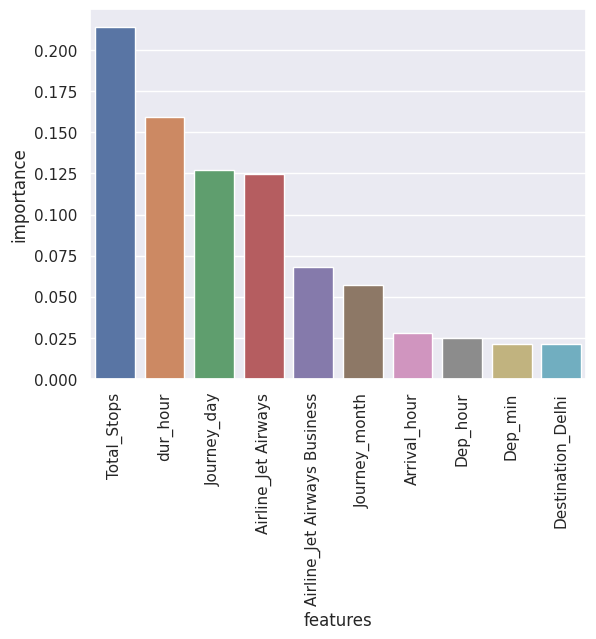

In [ ]:
sns.barplot(x = top_10_features['features'], y = top_10_features['importance'],palette='deep')
plt.xticks(rotation=90)

## Model training

In [ ]:
# prompt: pull all major regressor like the above

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

regressors = [
    LinearRegression(),
    ElasticNet(),
    Lasso(),
    Ridge(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(),
    XGBRegressor()
]


In [ ]:
results = {}

In [ ]:
from sklearn import metrics

In [ ]:
# Train and evaluate each model
for model in regressors:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate performance metrics
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    # Store results
    results[model.__class__.__name__] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

# # Print results
# for model_name, metrics in results.items():
#     print(f"Model: {model_name}")
#     print(f"MSE: {metrics['MSE']}")
#     print(f"MAE: {metrics['MAE']}")
#     print(f"R2: {metrics['R2']}")
#     print()


In [ ]:
# Create a dictionary with the model names and their corresponding metrics
data = {
    'Model': list(results.keys()),
    'MSE': [metrics['MSE'] for metrics in results.values()],
    'MAE': [metrics['MAE'] for metrics in results.values()],
    'R2': [metrics['R2'] for metrics in results.values()]
}

# Create a Pandas DataFrame
df_results = pd.DataFrame(data)

# Print the DataFrame
print(df_results)


                       Model           MSE          MAE        R2
0           LinearRegression  7.564165e+06  1942.130405  0.633499
1                 ElasticNet  1.153713e+07  2456.806977  0.441001
2                      Lasso  7.579008e+06  1944.611613  0.632780
3                      Ridge  7.640537e+06  1948.173273  0.629799
4      RandomForestRegressor  3.650801e+06  1171.709495  0.823111
5  GradientBoostingRegressor  4.443183e+06  1513.873224  0.784718
6          AdaBoostRegressor  9.535625e+06  2437.902940  0.537978
7                        SVR  1.985003e+07  3450.711362  0.038222
8               XGBRegressor  3.023994e+06  1135.359780  0.853481


from the above data we can clearly see RandomForestRegressor and XGBRegressor are giving better result


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
y_pred = reg_rf.predict(x_test)

In [ ]:
reg_rf.score(x_train, y_train)

0.9534502187400188

In [ ]:
metrics.r2_score(y_test, y_pred)

0.8226779984641728

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1167.6322645136095
MSE: 3659729.250012575
RMSE: 1913.0418840194209


## Hyperparameter Tuning

In [ ]:
# prompt: import randomsearchcv

from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space
hyperparameter_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 50, None],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' :[1, 2, 5, 10]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=reg_rf,
    param_distributions=hyperparameter_grid,
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=42,
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
best_model_score = best_model.score(x_test, y_test)

# Print the results
print("Best hyperparameters:", best_params)
print("Best model score:", best_model_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best model score: 0.8483869457448243


## XGBoost

In [ ]:


!pip install xgboost


In [ ]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Hyperparameter Tuning

In [ ]:

# Define the hyperparameter space
hyperparameter_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 50],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.6, 0.7],
    # 'colsample_bytree': [0.4, 0.5, 0.6,],
    # 'gamma': [0, 0.25, 0.5, 1.0],
    # 'min_child_weight': [1, 3, 5, 7],
    # 'reg_alpha': [ 0.001, 0.01, 0.1],
    # 'reg_lambda': [ 0.001, 0.01, 0.1]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=hyperparameter_grid,
    cv=5,
    verbose=1,

)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_model_score = best_model.score(x_test, y_test)

# Print the results
print("Best hyperparameters:", best_params)
print("Best model score:", best_model_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.6}
Best model score: 0.8323195910969009


## CONCLUSION

This project investigated the effectiveness of various machine learning algorithms for predicting flight fares. We compared several algorithms, and XGBoost and Random Forest stood out as the clear leaders, achieving impressive accuracy scores of 83% and 85%, respectively.